<a href="https://colab.research.google.com/github/selfmaded/python_study/blob/master/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **머신러닝으로 군집화하기**

# K-평균 알고리즘 

**라이브러리 import**

In [ ]:
import pandas as pd  
from sklearn.cluster import KMeans  
import seaborn as sns

**데이터셋 로드**

In [ ]:
from google.colab import drive
drive.mount('/gdrive') # google drive mount

Mounted at /gdrive


In [ ]:
filename = '/gdrive/My Drive/kmeans.csv' # google drive에 있는 LinearRegressiong 경로
#사이즈 코리아(https://sizekorea.kr/)
#2015년 남/녀 신장과 몸무게 데이터(500명)

**데이터 탐색**

In [ ]:
df = pd.read_csv(filename) # filename을 통해 csv파일 로드
print(df.head()) # df의 상위 5개 데이터 출력
print(df.shape)  # df 데이터의 shape 출력

ParserError: ignored

**데이터 시각화하여 확인하기**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


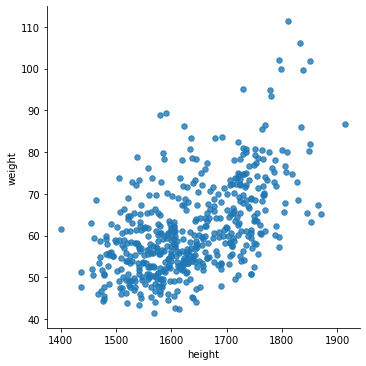

In [ ]:
sns.lmplot('height', 'weight',  # scatter plot 그리기 // x축 height, y축 weight 설정, data: df, fit_reg: 그래프의 회귀선 출력 여부(True/False), scatter_kws("s"): scatter 크기 설정 
           data=df, 
           fit_reg=False, 
           scatter_kws={"s": 30})

**클러스터링 수행**

In [ ]:
data_points = df.values # df 데이터 값을 data_points에 대입하여 선언
kmeans = KMeans(n_clusters=3).fit(data_points) # cluster를 3개로 구분하는 Kmeans 모델을 선언한 후, 모델을 통해 data_points 데이터 clustering

In [ ]:
kmeans.labels_[:10] # kmeans를 통해 clustering된 결과 중 상위 10개를 반환

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
df['cluster'] = kmeans.labels_ # kmeans를 통해 clustering된 결과를 df 데이터의 cluster로 추가
df.head() # df 상위 5개 데이터 반환

,height,weight,cluster
0,1736,72.1,1
1,1833,106.2,1
2,1744,69.1,1
3,1751,68.4,1
4,1851,81.9,1


**결과 시각화**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


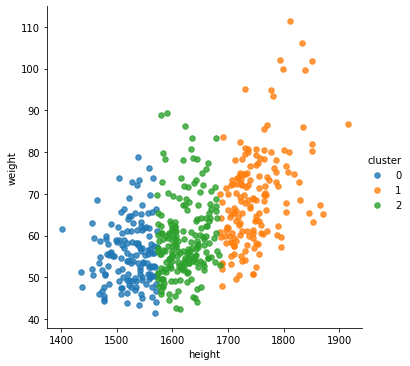

In [ ]:
sns.lmplot('height', 'weight', # scatter plot 그리기 // x축 height, y축 weight 설정, data: df, fit_reg: 그래프의 회귀선 출력 여부(True/False), scatter_kws("s"): scatter 크기 설정, hue: cluster를 기준으로 구분
           data=df, 
           fit_reg=False, 
           scatter_kws={"s": 30}, 
           hue='cluster')

#IRIS 분류 

**라이브러리 import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

**데이터셋 로드 및 확인**

In [ ]:
iris = load_iris() # iris 데이터 로드
data = iris.data[:,[0,1]] # iris의 각 데이터 중에 첫번째와 두번째 데이터만을 data에 대입하여 선언
data[:10] # data 상위 10개 데이터 반환

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

**클러스터링 수행 및 시각화**

In [ ]:
kmeans_iris = KMeans(n_clusters=3).fit(data) # 3개의 cluster를 갖는 KMeans 모델을 선언한 후, 모델을 사용하여 data를 clustering하여 kmeans_iris에 대입하여 선언

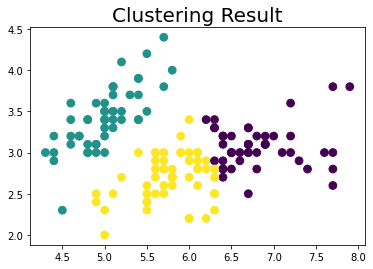

In [ ]:
labels = kmeans_iris.labels_ # kmeans를 통해 얻은 clustering 결과를 labels에 대입하여 선언
plt.title('Clustering Result', fontsize=20) # plot title 설정 및 크기 조정
plt.scatter(data[:,0], data[:,1], c=labels, s=60) # scatter plot 그리기 (x축: data[:,0], y축: data[:,1], c=labels(cluster 결과를 기준으로 색을 다르게 설정), s=60(scatter size 설정))

**분류 정확도 확인**

In [ ]:
target = iris.target # iris target 데이터를 target에 대입하여 선언
df = pd.DataFrame({'labels': labels, 'target': target}) # labels와 target 데이터를 dictionary로 만들고 df에 대입하여 선언
ct = pd.crosstab(df['labels'], df['target']) # pandas crosstab을 활용하여 labels와 target 데이터에 대한 빈도표 생성
ct

**최적의 k값 찾기**

[2, 3, 4, 5, 6, 7, 8]


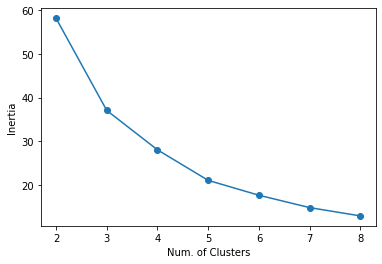

In [ ]:
num_clusters = list(range(2, 9)) # 2~8 의 값을 갖는 list를 num_clusters에 대입하여 선언
inertias = [] # inertias 선언

for i in num_clusters:  # 각 K별로 모델을 생성하여 inertia를 측정
    model = KMeans(n_clusters=i) # i개의 cluster를 갖는 KMeans 모델을 model에 대입하여 선언
    model.fit(data) # model을 통해 data clustering
    inertias.append(model.inertia_) # model의 inertia value를 intertias에 추가

plt.plot(num_clusters, inertias, '-o')  # K에 따른 inertia의 변화 시각화, line 모양은 '-o'
plt.xlabel('Num. of Clusters') # x label title 설정
plt.ylabel('Inertia') # y label title 설정
plt.show() # 그래프 출력

# 계층적 군집화 

**라이브러리 import**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iris = datasets.load_iris() # iris 데이터 로드

labels = pd.DataFrame(iris.target) # iris target 데이터를 DataFrame으로 만들어 labels에 대입하여 선언
labels.columns=['labels'] # labels 데이터의 column에 labels 추가
data = pd.DataFrame(iris.data) # iris data를 DataFrame으로 만들어 data에 대입하여 선언
data = pd.concat([data,labels],axis=1) # data와 labels를 concat하여 data에 대입
data.head() # data의 상위 5개 데이터 반환

,0,1,2,3,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**클러스터링 수행**

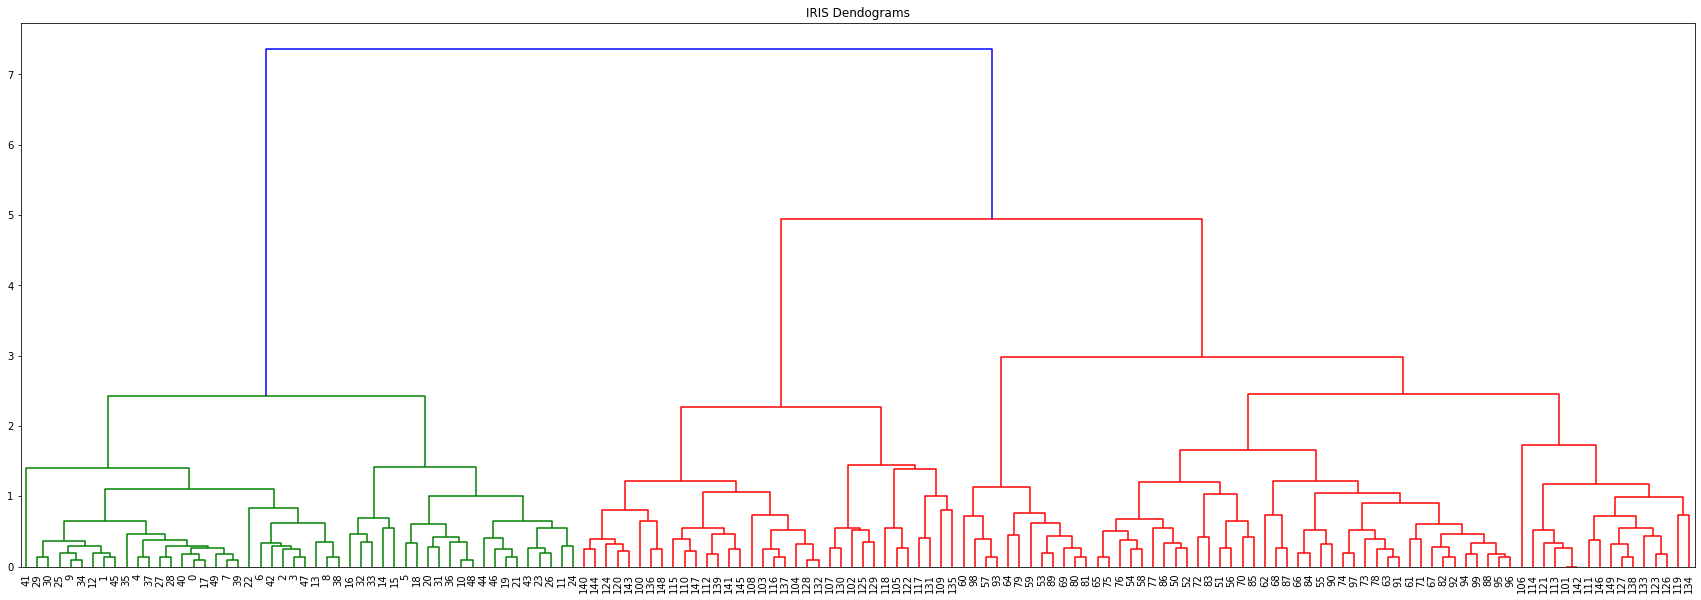

In [ ]:
merge = linkage(data, method='complete')  # linkage를 통해 data Hierarchical clustering 수행 / method(single, average, complete, ward)

plt.figure(figsize=(30,10)) # figure size 설정
plt.title("IRIS Dendograms") # plot title 설정

dendrogram(merge, # dendrogram 시각화, data=merge, leaf_rotation: x축에 표시되는 leaf 각도 설정, leaf_font_size: leaf 폰트 크기 설정
           leaf_rotation=90,
           leaf_font_size=10)
plt.show() # 그래프 출력

**클러스터 자르기**

In [ ]:
cut = fcluster(merge, t=3, criterion='distance') # merge 데이터를 distance 기준으로 fcluster를 통해 3개의 cluster로 분류하여 cut에 대입하여 선언
cut 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

**분류 결과 확인**

In [ ]:
labels = data['labels'] # data labels 데이터를 labels에 대입하여 선언
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In [ ]:
df = pd.DataFrame({'predict':cut, 'labels':labels}) # cut과 labels를 DataFrame 형식으로 만들어 df에 대입한후 선언
df

,predict,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [ ]:
ct = pd.crosstab(df['predict'], df['labels']) # predict와 labels의 빈도표를 생성하여 ct에 대입
ct

labels,0,1,2
predict,,,
1,50,0,0
2,0,0,34
3,0,50,16
